In [9]:
# Import des librairies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from   statsmodels.compat import lzip
from   statsmodels.graphics.gofplots import ProbPlot
import statsmodels.stats.stattools

import scipy.stats as st
import scipy
from   scipy.stats import ks_2samp
import math
import random
import time

import matplotlib.mlab as mlab
import matplotlib.lines as mlines
from scipy.stats import norm

from statsmodels import graphics

In [11]:
occitanie = pd.read_excel("occitanie.xlsx")                     
occitanie

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,...,TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
0,Occitanie,Données définitives,2022-01-01,00:00:00,5000.0,80.0,2558.0,32.0,0.0,1368.0,...,51.16,97.63,0.64,2.02,0.0,0.0,27.36,25.89,1.78,59.73
1,Occitanie,Données définitives,2022-01-01,00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Occitanie,Données définitives,2022-01-01,00:30:00,4894.0,83.0,2561.0,21.0,0.0,1877.0,...,52.33,97.75,0.43,1.33,0.0,0.0,38.35,35.53,1.86,61.07
3,Occitanie,Données définitives,2022-01-01,00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Occitanie,Données définitives,2022-01-01,01:00:00,4680.0,86.0,2561.0,29.0,0.0,1402.0,...,54.72,97.75,0.62,1.83,0.0,0.0,29.96,26.54,1.97,61.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,Occitanie,Données définitives,2022-12-31,22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,Occitanie,Données définitives,2022-12-31,23:00:00,4813.0,88.0,1231.0,418.0,0.0,400.0,...,25.58,46.98,8.68,25.49,0.0,0.0,8.31,7.55,2.10,59.06
35037,Occitanie,Données définitives,2022-12-31,23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,Occitanie,Données définitives,2022-12-31,23:30:00,4382.0,88.0,1243.0,408.0,0.0,393.0,...,28.37,47.44,9.31,24.88,0.0,0.0,8.97,7.42,2.30,59.06


In [13]:
occitanie = occitanie[['Périmètre', 'Date', 'Consommation', 'Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']]
occitanie

,Périmètre,Date,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
0,Occitanie,2022-01-01,5000.0,80.0,2558.0,32.0,0.0,1368.0,89.0
1,Occitanie,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Occitanie,2022-01-01,4894.0,83.0,2561.0,21.0,0.0,1877.0,91.0
3,Occitanie,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Occitanie,2022-01-01,4680.0,86.0,2561.0,29.0,0.0,1402.0,92.0
...,...,...,...,...,...,...,...,...,...
35035,Occitanie,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,Occitanie,2022-12-31,4813.0,88.0,1231.0,418.0,0.0,400.0,101.0
35037,Occitanie,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,Occitanie,2022-12-31,4382.0,88.0,1243.0,408.0,0.0,393.0,101.0


In [17]:
occitanie.isnull().sum()

Périmètre           0
Date                0
Consommation    17520
Thermique       17520
Nucléaire       17520
Eolien          17520
Solaire         17520
Hydraulique     17520
Bioénergies     17520
dtype: int64

In [19]:
#les lignes contenant les valeurs manquantes 
occitanie[occitanie.isnull().any(axis=1)]


,Périmètre,Date,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
1,Occitanie,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Occitanie,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Occitanie,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Occitanie,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Occitanie,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35031,Occitanie,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35033,Occitanie,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35035,Occitanie,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35037,Occitanie,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#suppression des lignes contenant les valeurs manquantes
occitanie = occitanie.dropna()
occitanie

,Périmètre,Date,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
0,Occitanie,2022-01-01,5000.0,80.0,2558.0,32.0,0.0,1368.0,89.0
2,Occitanie,2022-01-01,4894.0,83.0,2561.0,21.0,0.0,1877.0,91.0
4,Occitanie,2022-01-01,4680.0,86.0,2561.0,29.0,0.0,1402.0,92.0
6,Occitanie,2022-01-01,4663.0,87.0,2560.0,39.0,0.0,1229.0,92.0
8,Occitanie,2022-01-01,4661.0,91.0,2561.0,47.0,0.0,1109.0,91.0
...,...,...,...,...,...,...,...,...,...
35030,Occitanie,2022-12-31,3793.0,88.0,1234.0,418.0,0.0,416.0,101.0
35032,Occitanie,2022-12-31,3214.0,88.0,1240.0,406.0,0.0,392.0,101.0
35034,Occitanie,2022-12-31,3411.0,88.0,1240.0,383.0,0.0,400.0,103.0
35036,Occitanie,2022-12-31,4813.0,88.0,1231.0,418.0,0.0,400.0,101.0


In [39]:
occitanie.loc[:, 'Date'] = pd.to_datetime(occitanie['Date'])

In [43]:
# Extraire l'année et le mois en utilisant .loc
occitanie.loc[:, 'Mois'] = occitanie['Date'].dt.to_period('M')

In [47]:
#calcul de la somme de consommation par mois
consommation_totale_par_mois = occitanie.groupby('Mois')['Consommation'].sum()
print(consommation_totale_par_mois)

Mois
2022-01    9004348.0
2022-02    6925046.0
2022-03    7094961.0
2022-04    6011748.0
2022-05    5077104.0
2022-06    5307116.0
2022-07    5932694.0
2022-08    5815983.0
2022-09    5064662.0
2022-10    4841478.0
2022-11    5740015.0
2022-12    7232513.0
Freq: M, Name: Consommation, dtype: float64


In [59]:
# Utiliser .loc pour assigner les valeurs dans la colonne 'Mois_nom'
occitanie.loc[:, 'Mois_nom'] = occitanie['Mois'].dt.month.apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

# Calcul de la somme de consommation par mois
consommation_totale_par_mois = occitanie.groupby('Mois_nom')['Consommation'].sum().reset_index()

# Trier par mois dans l'ordre chronologique
mois_ordre = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
consommation_totale_par_mois['Mois_nom'] = pd.Categorical(consommation_totale_par_mois['Mois_nom'], categories=mois_ordre, ordered=True)
consommation_totale_par_mois = consommation_totale_par_mois.sort_values('Mois_nom')

# Réinitialiser l'index et afficher le résultat
consommation_totale_par_mois = consommation_totale_par_mois.reset_index(drop=True)
print(consommation_totale_par_mois)


     Mois_nom  Consommation
0     January     9004348.0
1    February     6925046.0
2       March     7094961.0
3       April     6011748.0
4         May     5077104.0
5        June     5307116.0
6        July     5932694.0
7      August     5815983.0
8   September     5064662.0
9     October     4841478.0
10   November     5740015.0
11   December     7232513.0


In [63]:
# Calculer la production totale pour chaque source d'énergie par mois
production_totale_par_mois = occitanie.groupby('Mois_nom')[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']].sum().reset_index()

# Ajouter l'ordre des mois pour trier par mois
mois_ordre = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
production_totale_par_mois['Mois_num'] = production_totale_par_mois['Mois_nom'].map(mois_ordre)

# Trier les données par ordre chronologique
production_totale_par_mois = production_totale_par_mois.sort_values('Mois_num')

# Supprimer la colonne 'Mois_num' car elle n'est plus nécessaire
production_totale_par_mois = production_totale_par_mois.drop(columns=['Mois_num'])

# Réinitialiser l'index
production_totale_par_mois = production_totale_par_mois.reset_index(drop=True)

# Fusionner la consommation totale par mois avec la production totale par mois
resultat = pd.merge(consommation_totale_par_mois, production_totale_par_mois, on='Mois_nom', how='left')

# Afficher le résultat
print(resultat)

     Mois_nom  Consommation  Thermique  Nucléaire    Eolien    Solaire  \
0     January     9004348.0   144322.0  3740805.0  689016.0   375374.0   
1    February     6925046.0   117603.0  2913226.0  809297.0   428692.0   
2       March     7094961.0    82974.0  1888981.0  776569.0   502533.0   
3       April     6011748.0    13328.0  1696114.0  662113.0   685324.0   
4         May     5077104.0     1731.0  1828267.0  445064.0   920165.0   
5        June     5307116.0      239.0  1757348.0  400137.0   881677.0   
6        July     5932694.0      561.0  1448519.0  371275.0  1029578.0   
7      August     5815983.0      439.0  1700107.0  307351.0   907179.0   
8   September     5064662.0     6341.0  1737548.0  417170.0   728452.0   
9     October     4841478.0     5223.0  1859850.0  393176.0   522157.0   
10   November     5740015.0    89771.0  1826939.0  618324.0   360873.0   
11   December     7232513.0   141040.0  1891338.0  351421.0   223053.0   

    Hydraulique  Bioénergies  
0     

In [99]:
# Exporter en CSV
resultat.to_excel('occitanie_clean.xlsx', index=False)

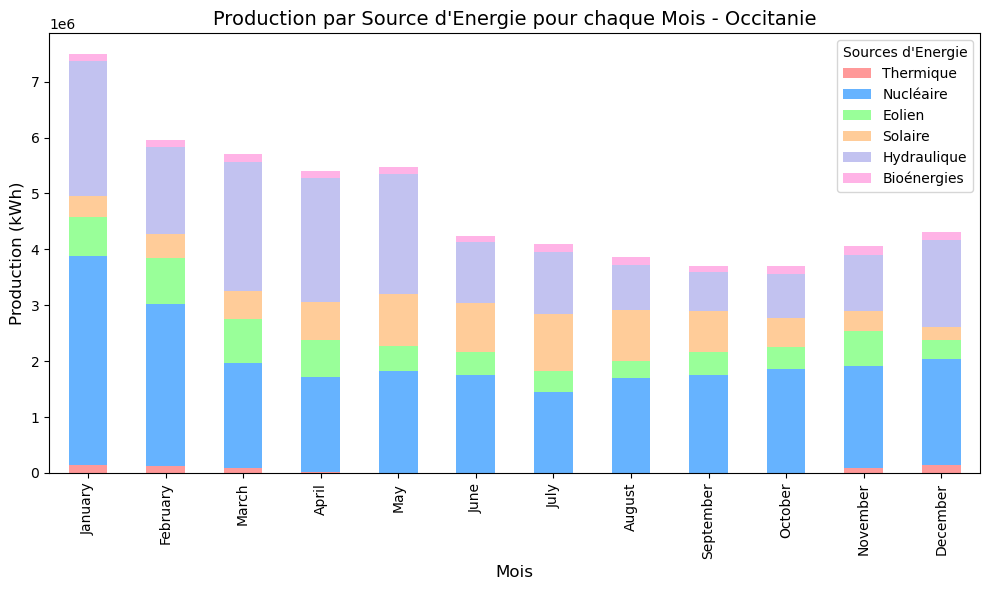

In [95]:
# Définir les couleurs 
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# création du graphique 
ax = resultat.set_index('Mois_nom')[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']].plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Ajouter des labels et des filtres
plt.title('Production par Source d\'Energie pour chaque Mois - Occitanie', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Production (kWh)', fontsize=12)

# la légende
plt.legend(title='Sources d\'Energie')

# le graphique
plt.tight_layout()
plt.savefig('productionparsource.png', format='png')
plt.show()

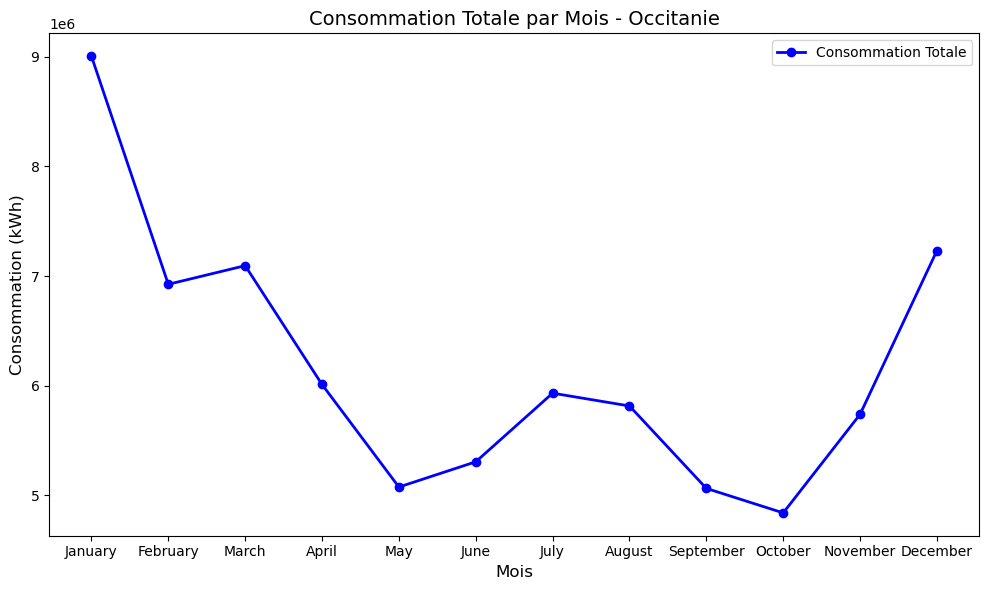

In [93]:
# la consommation totale par mois
plt.figure(figsize=(10, 6))
plt.plot(resultat['Mois_nom'], resultat['Consommation'], label='Consommation Totale', color='blue', marker='o', linestyle='-', linewidth=2)

# les labels et le titre
plt.title('Consommation Totale par Mois - Occitanie', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Consommation (kWh)', fontsize=12)

# la légende
plt.legend()

# le graphique
plt.tight_layout()
plt.savefig('consommation_totale_par_mois.png', format='png')
plt.show()


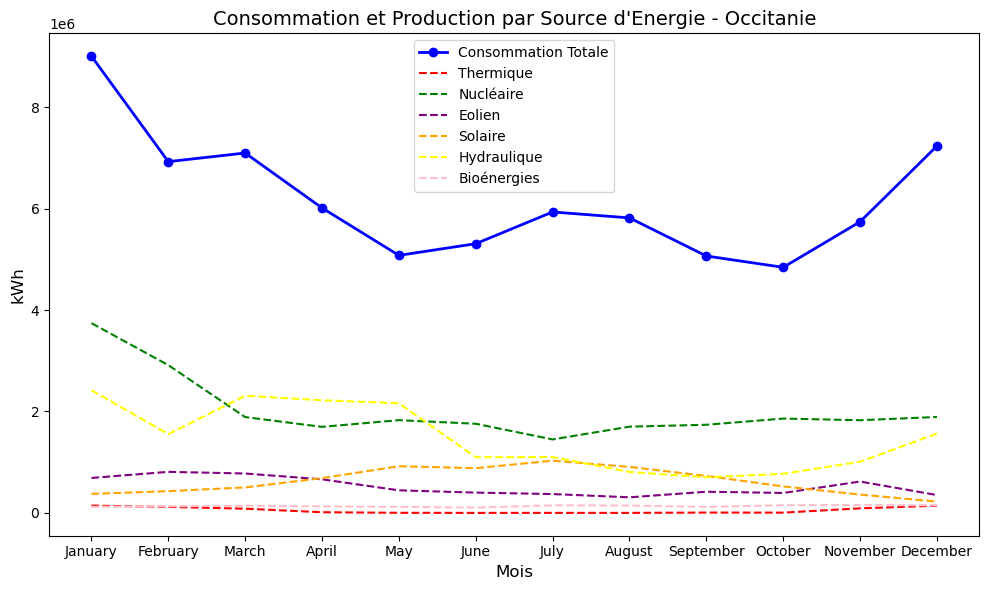

In [89]:
# Créer le graphique combiné pour comparer la consommation et la production par source
plt.figure(figsize=(10, 6))

# Tracer la consommation totale par mois
plt.plot(resultat['Mois_nom'], resultat['Consommation'], label='Consommation Totale', color='blue', marker='o', linestyle='-', linewidth=2)

# Tracer la production totale par source d'énergie
plt.plot(resultat['Mois_nom'], resultat['Thermique'], label='Thermique', color='red', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Nucléaire'], label='Nucléaire', color='green', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Eolien'], label='Eolien', color='purple', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Solaire'], label='Solaire', color='orange', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Hydraulique'], label='Hydraulique', color='yellow', linestyle='--')
plt.plot(resultat['Mois_nom'], resultat['Bioénergies'], label='Bioénergies', color='pink', linestyle='--')

# Ajouter les labels et le titre
plt.title('Consommation et Production par Source d\'Energie - Occitanie', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('kWh', fontsize=12)

# Ajouter la légende
plt.legend()

# Sauvegarder le graphique avant d'afficher
plt.tight_layout()
plt.savefig('consommation_prod.png', format='png')  # Sauvegarder l'image

# Afficher le graphique
plt.show()


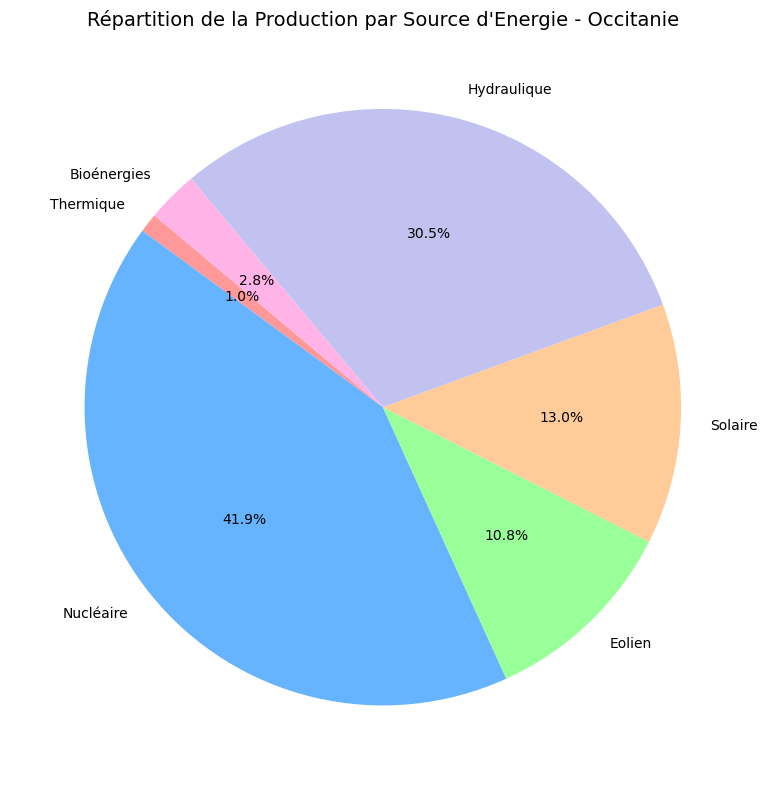

In [91]:
# Calculer la production totale par mois
total_production = resultat[['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Bioénergies']].sum()

# Créer un graphique circulaire pour la part de chaque source d'énergie
plt.figure(figsize=(8, 8))
plt.pie(total_production, labels=total_production.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Ajouter le titre
plt.title('Répartition de la Production par Source d\'Energie - Occitanie', fontsize=14)

# Afficher le graphique
plt.tight_layout()
plt.savefig('répartitiondeproduction.png', format='png')

plt.show()
